# Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, )

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x10f943978>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x10f943198>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import ConstantLearningRateScheduler

# Experiment

Epoch 1: 7.4s to complete
    error(train)=1.21e+00, acc(train)=6.60e-01, error(valid)=1.24e+00, acc(valid)=6.49e-01


Epoch 2: 9.5s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.08e+00, acc(valid)=6.86e-01


Epoch 3: 7.3s to complete
    error(train)=9.47e-01, acc(train)=7.25e-01, error(valid)=9.89e-01, acc(valid)=7.11e-01


Epoch 4: 8.1s to complete
    error(train)=8.76e-01, acc(train)=7.45e-01, error(valid)=9.19e-01, acc(valid)=7.28e-01


Epoch 5: 7.5s to complete
    error(train)=8.23e-01, acc(train)=7.57e-01, error(valid)=8.71e-01, acc(valid)=7.37e-01


Epoch 6: 7.0s to complete
    error(train)=7.80e-01, acc(train)=7.69e-01, error(valid)=8.30e-01, acc(valid)=7.49e-01


Epoch 7: 6.9s to complete
    error(train)=7.45e-01, acc(train)=7.76e-01, error(valid)=8.01e-01, acc(valid)=7.56e-01


Epoch 8: 7.0s to complete
    error(train)=7.13e-01, acc(train)=7.85e-01, error(valid)=7.73e-01, acc(valid)=7.64e-01


Epoch 9: 6.9s to complete
    error(train)=6.91e-01, acc(train)=7.89e-01, error(valid)=7.55e-01, acc(valid)=7.67e-01


Epoch 10: 7.2s to complete
    error(train)=6.69e-01, acc(train)=7.95e-01, error(valid)=7.33e-01, acc(valid)=7.71e-01


Epoch 11: 7.1s to complete
    error(train)=6.47e-01, acc(train)=8.01e-01, error(valid)=7.13e-01, acc(valid)=7.79e-01


Epoch 12: 7.2s to complete
    error(train)=6.32e-01, acc(train)=8.04e-01, error(valid)=7.02e-01, acc(valid)=7.79e-01


Epoch 13: 7.0s to complete
    error(train)=6.14e-01, acc(train)=8.09e-01, error(valid)=6.85e-01, acc(valid)=7.85e-01


Epoch 14: 7.3s to complete
    error(train)=6.01e-01, acc(train)=8.13e-01, error(valid)=6.77e-01, acc(valid)=7.88e-01


Epoch 15: 7.1s to complete
    error(train)=5.92e-01, acc(train)=8.14e-01, error(valid)=6.69e-01, acc(valid)=7.87e-01


Epoch 16: 7.4s to complete
    error(train)=5.77e-01, acc(train)=8.17e-01, error(valid)=6.62e-01, acc(valid)=7.90e-01


Epoch 17: 7.0s to complete
    error(train)=5.66e-01, acc(train)=8.21e-01, error(valid)=6.50e-01, acc(valid)=7.95e-01


Epoch 18: 7.2s to complete
    error(train)=5.55e-01, acc(train)=8.25e-01, error(valid)=6.42e-01, acc(valid)=7.97e-01


Epoch 19: 6.9s to complete
    error(train)=5.48e-01, acc(train)=8.25e-01, error(valid)=6.42e-01, acc(valid)=7.96e-01


Epoch 20: 7.1s to complete
    error(train)=5.37e-01, acc(train)=8.29e-01, error(valid)=6.29e-01, acc(valid)=7.99e-01


Epoch 21: 7.2s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=6.24e-01, acc(valid)=8.01e-01


Epoch 22: 7.0s to complete
    error(train)=5.21e-01, acc(train)=8.34e-01, error(valid)=6.17e-01, acc(valid)=8.03e-01


Epoch 23: 6.8s to complete
    error(train)=5.14e-01, acc(train)=8.34e-01, error(valid)=6.17e-01, acc(valid)=8.00e-01


Epoch 24: 6.9s to complete
    error(train)=5.03e-01, acc(train)=8.38e-01, error(valid)=6.04e-01, acc(valid)=8.05e-01


Epoch 25: 5.0s to complete
    error(train)=5.00e-01, acc(train)=8.38e-01, error(valid)=6.06e-01, acc(valid)=8.05e-01


Epoch 26: 4.2s to complete
    error(train)=4.91e-01, acc(train)=8.42e-01, error(valid)=6.00e-01, acc(valid)=8.08e-01


Epoch 27: 3.8s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.98e-01, acc(valid)=8.07e-01


Epoch 28: 9.7s to complete
    error(train)=4.85e-01, acc(train)=8.43e-01, error(valid)=5.98e-01, acc(valid)=8.08e-01


Epoch 29: 4.5s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=5.86e-01, acc(valid)=8.11e-01


Epoch 30: -7.0s to complete
    error(train)=4.67e-01, acc(train)=8.49e-01, error(valid)=5.86e-01, acc(valid)=8.12e-01


Epoch 31: 4.3s to complete
    error(train)=4.63e-01, acc(train)=8.50e-01, error(valid)=5.81e-01, acc(valid)=8.14e-01


Epoch 32: 4.2s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.83e-01, acc(valid)=8.10e-01


Epoch 33: 4.2s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.79e-01, acc(valid)=8.14e-01


Epoch 34: 4.2s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.79e-01, acc(valid)=8.13e-01


Epoch 35: 4.3s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.74e-01, acc(valid)=8.13e-01


Epoch 36: 4.3s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.69e-01, acc(valid)=8.16e-01


Epoch 37: 4.2s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.70e-01, acc(valid)=8.15e-01


Epoch 38: 4.3s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.71e-01, acc(valid)=8.15e-01


Epoch 39: 4.5s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


Epoch 40: 4.2s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=5.66e-01, acc(valid)=8.16e-01


Epoch 41: 4.1s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=5.65e-01, acc(valid)=8.16e-01


Epoch 42: 4.3s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.66e-01, acc(valid)=8.16e-01


Epoch 43: 4.1s to complete
    error(train)=4.18e-01, acc(train)=8.63e-01, error(valid)=5.65e-01, acc(valid)=8.16e-01


Epoch 44: 4.4s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.61e-01, acc(valid)=8.17e-01


Epoch 45: 4.4s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.59e-01, acc(valid)=8.18e-01


Epoch 46: 4.3s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.57e-01, acc(valid)=8.19e-01


Epoch 47: 4.2s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=5.56e-01, acc(valid)=8.19e-01


Epoch 48: 4.1s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=5.55e-01, acc(valid)=8.19e-01


Epoch 49: 4.3s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=5.60e-01, acc(valid)=8.18e-01


Epoch 50: 4.2s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.57e-01, acc(valid)=8.20e-01


Epoch 51: 4.1s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.56e-01, acc(valid)=8.20e-01


Epoch 52: 5.5s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 53: 4.2s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.55e-01, acc(valid)=8.19e-01


Epoch 54: 4.3s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


Epoch 55: 4.2s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=5.60e-01, acc(valid)=8.18e-01


Epoch 56: 4.4s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=5.54e-01, acc(valid)=8.20e-01


Epoch 57: 4.1s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=5.56e-01, acc(valid)=8.20e-01


Epoch 58: 4.1s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=5.56e-01, acc(valid)=8.21e-01


Epoch 59: 4.1s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 60: 4.2s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.49e-01, acc(valid)=8.22e-01


Epoch 61: 4.2s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


Epoch 62: 4.2s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


Epoch 63: 4.3s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.50e-01, acc(valid)=8.21e-01


Epoch 64: 4.2s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


Epoch 65: 4.1s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


Epoch 66: 4.1s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


Epoch 67: 4.3s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.52e-01, acc(valid)=8.21e-01


Epoch 68: 4.1s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


Epoch 69: 4.2s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 70: 4.3s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 71: 4.4s to complete
    error(train)=3.47e-01, acc(train)=8.83e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 72: 4.2s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


Epoch 73: 4.2s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


Epoch 74: 4.4s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 75: 4.1s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


Epoch 76: 4.2s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


Epoch 77: 4.2s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 78: 4.2s to complete
    error(train)=3.33e-01, acc(train)=8.87e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


Epoch 79: 4.2s to complete
    error(train)=3.32e-01, acc(train)=8.87e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 80: 4.1s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


Epoch 81: 4.4s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01


Epoch 82: 4.3s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


Epoch 83: 4.2s to complete
    error(train)=3.29e-01, acc(train)=8.86e-01, error(valid)=5.62e-01, acc(valid)=8.23e-01


Epoch 84: 4.1s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


Epoch 85: 4.2s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


Epoch 86: 4.2s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 87: 4.1s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.60e-01, acc(valid)=8.25e-01


Epoch 88: 4.5s to complete
    error(train)=3.20e-01, acc(train)=8.90e-01, error(valid)=5.60e-01, acc(valid)=8.24e-01


Epoch 89: 4.1s to complete
    error(train)=3.15e-01, acc(train)=8.93e-01, error(valid)=5.59e-01, acc(valid)=8.25e-01


Epoch 90: 4.2s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.60e-01, acc(valid)=8.25e-01


Epoch 91: 4.2s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=5.64e-01, acc(valid)=8.26e-01


Epoch 92: 4.3s to complete
    error(train)=3.11e-01, acc(train)=8.94e-01, error(valid)=5.62e-01, acc(valid)=8.24e-01


Epoch 93: 4.3s to complete
    error(train)=3.09e-01, acc(train)=8.94e-01, error(valid)=5.60e-01, acc(valid)=8.26e-01


Epoch 94: 4.1s to complete
    error(train)=3.15e-01, acc(train)=8.90e-01, error(valid)=5.68e-01, acc(valid)=8.23e-01


Epoch 95: 4.4s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=5.68e-01, acc(valid)=8.22e-01


Epoch 96: 4.2s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=5.64e-01, acc(valid)=8.24e-01


Epoch 97: 4.2s to complete
    error(train)=3.04e-01, acc(train)=8.95e-01, error(valid)=5.63e-01, acc(valid)=8.23e-01


Epoch 98: 4.4s to complete
    error(train)=3.07e-01, acc(train)=8.94e-01, error(valid)=5.67e-01, acc(valid)=8.26e-01


Epoch 99: 4.5s to complete
    error(train)=2.99e-01, acc(train)=8.97e-01, error(valid)=5.65e-01, acc(valid)=8.25e-01


Epoch 100: 4.2s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=5.65e-01, acc(valid)=8.25e-01



--------------------------------------------------------------------------------
learning_rate=0.900
--------------------------------------------------------------------------------


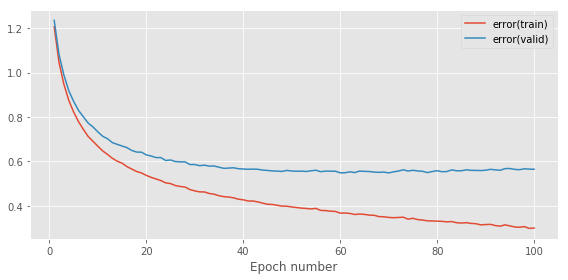

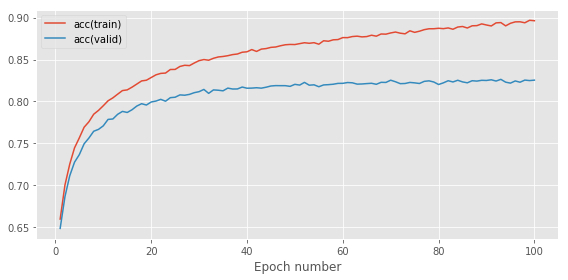

    final error(train) = 3.00e-01
    final error(valid) = 5.65e-01
    final acc(train)   = 8.96e-01
    final acc(valid)   = 8.25e-01
    run time per epoch = 6.54


In [6]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
learning_rate = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
decay_rate = 0.9

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

scheduler = ConstantLearningRateScheduler(learning_rate)

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate, beta_1=decay_rate, beta_2=0.999)

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, test_data, num_epochs, stats_interval, notebook=True)

fig_1.tight_layout()
fig_1_name = "adam_fig_1_test_set.pdf"
fig_1.savefig(fig_1_name)

fig_2.tight_layout()
fig_2_name = "adam_fig_2_test_set.pdf"
fig_2.savefig(fig_2_name)

print('-' * 80)
print('learning_rate={0:.3f}'
      .format(decay_rate))
print('-' * 80)

plt.show()

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))